In [75]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, os, seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set(rc={"figure.dpi":600, 'savefig.dpi':600})

In [76]:
veri=pd.read_csv(os.path.join(os.getcwd(),"yapay_zeka","veri_setleri","kalp_rahatsizligi.csv"))
veri.head()
veri.tail()

,yas,cinsiyet,gogus_agrisi_tipi,hareketsiz_kan_basinci,serum_kolestrol,aclik_kan_sekeri,elektrokardiyografi,en_yuksek_kalp_hizi,anjin_bagli_egsersiz,st_depresyonu,st_egimi,buyuk_damarlar,talasemi,kalp_rahatsizligi
0,63.0,erkek,tipik anjinal,145.0,233.0,1,sol ventikuler hipertrofi,150.0,0,2.3,asagi egimli,0.0,sabit defekt,0
1,67.0,erkek,asemptomatik,160.0,286.0,0,sol ventikuler hipertrofi,108.0,1,1.5,duz,3.0,normal,1
2,67.0,erkek,asemptomatik,120.0,229.0,0,sol ventikuler hipertrofi,129.0,1,2.6,duz,2.0,tersinir defekt,1
3,37.0,erkek,anjinal olmayan,130.0,250.0,0,normal,187.0,0,3.5,asagi egimli,0.0,normal,0
4,41.0,kadin,atipik anjinal,130.0,204.0,0,sol ventikuler hipertrofi,172.0,0,1.4,yukari egimli,0.0,normal,0


,yas,cinsiyet,gogus_agrisi_tipi,hareketsiz_kan_basinci,serum_kolestrol,aclik_kan_sekeri,elektrokardiyografi,en_yuksek_kalp_hizi,anjin_bagli_egsersiz,st_depresyonu,st_egimi,buyuk_damarlar,talasemi,kalp_rahatsizligi
298,45.0,erkek,tipik anjinal,110.0,264.0,0,normal,132.0,0,1.2,duz,0.0,tersinir defekt,1
299,68.0,erkek,asemptomatik,144.0,193.0,1,normal,141.0,0,3.4,duz,2.0,tersinir defekt,1
300,57.0,erkek,asemptomatik,130.0,131.0,0,normal,115.0,1,1.2,duz,1.0,tersinir defekt,1
301,57.0,kadin,atipik anjinal,130.0,236.0,0,sol ventikuler hipertrofi,174.0,0,0.0,duz,1.0,normal,1
302,38.0,erkek,anjinal olmayan,138.0,175.0,0,normal,173.0,0,0.0,yukari egimli,NaN,normal,0


In [77]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yas                     303 non-null    float64
 1   cinsiyet                303 non-null    object 
 2   gogus_agrisi_tipi       303 non-null    object 
 3   hareketsiz_kan_basinci  303 non-null    float64
 4   serum_kolestrol         303 non-null    float64
 5   aclik_kan_sekeri        303 non-null    int64  
 6   elektrokardiyografi     303 non-null    object 
 7   en_yuksek_kalp_hizi     303 non-null    float64
 8   anjin_bagli_egsersiz    303 non-null    int64  
 9   st_depresyonu           303 non-null    float64
 10  st_egimi                303 non-null    object 
 11  buyuk_damarlar          299 non-null    float64
 12  talasemi                301 non-null    object 
 13  kalp_rahatsizligi       303 non-null    int64  
dtypes: float64(6), int64(3), object(5)
memory 

In [78]:
veri.describe()

,yas,hareketsiz_kan_basinci,serum_kolestrol,aclik_kan_sekeri,en_yuksek_kalp_hizi,anjin_bagli_egsersiz,st_depresyonu,buyuk_damarlar,kalp_rahatsizligi
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,131.689769,246.693069,0.148515,149.607261,0.326733,1.039604,0.672241,0.458746
std,9.038662,17.599748,51.776918,0.356198,22.875003,0.469794,1.161075,0.937438,0.499120
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,0.000000,153.000000,0.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [79]:
veri.hareketsiz_kan_basinci.describe()

q1=veri.hareketsiz_kan_basinci.describe()[4]
q3=veri.hareketsiz_kan_basinci.describe()[6]
iqr=q3-q1
alt=q1-1.5*iqr
ust=q3+1.5*iqr
print(f"alt sinir={alt}\nust sinir={ust}")

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: hareketsiz_kan_basinci, dtype: float64

alt sinir=90.0
ust sinir=170.0


In [80]:
veri[veri.hareketsiz_kan_basinci>170]

,yas,cinsiyet,gogus_agrisi_tipi,hareketsiz_kan_basinci,serum_kolestrol,aclik_kan_sekeri,elektrokardiyografi,en_yuksek_kalp_hizi,anjin_bagli_egsersiz,st_depresyonu,st_egimi,buyuk_damarlar,talasemi,kalp_rahatsizligi
14,52.0,erkek,anjinal olmayan,172.0,199.0,1,normal,162.0,0,0.5,yukari egimli,0.0,tersinir defekt,0
83,68.0,erkek,anjinal olmayan,180.0,274.0,1,sol ventikuler hipertrofi,150.0,1,1.6,duz,0.0,tersinir defekt,1
126,56.0,kadin,asemptomatik,200.0,288.0,1,sol ventikuler hipertrofi,133.0,1,4.0,asagi egimli,2.0,tersinir defekt,1
172,59.0,kadin,asemptomatik,174.0,249.0,0,normal,143.0,1,0.0,duz,0.0,normal,1
183,59.0,erkek,tipik anjinal,178.0,270.0,0,sol ventikuler hipertrofi,145.0,0,4.2,asagi egimli,0.0,tersinir defekt,0
188,54.0,erkek,atipik anjinal,192.0,283.0,0,sol ventikuler hipertrofi,195.0,0,0.0,yukari egimli,1.0,tersinir defekt,1
201,64.0,kadin,asemptomatik,180.0,325.0,0,normal,154.0,1,0.0,yukari egimli,0.0,normal,0
213,66.0,kadin,asemptomatik,178.0,228.0,1,normal,165.0,1,1.0,duz,2.0,tersinir defekt,1
231,55.0,kadin,asemptomatik,180.0,327.0,0,ST-T anormal,117.0,1,3.4,duz,0.0,normal,1


<AxesSubplot:xlabel='hareketsiz_kan_basinci', ylabel='Count'>

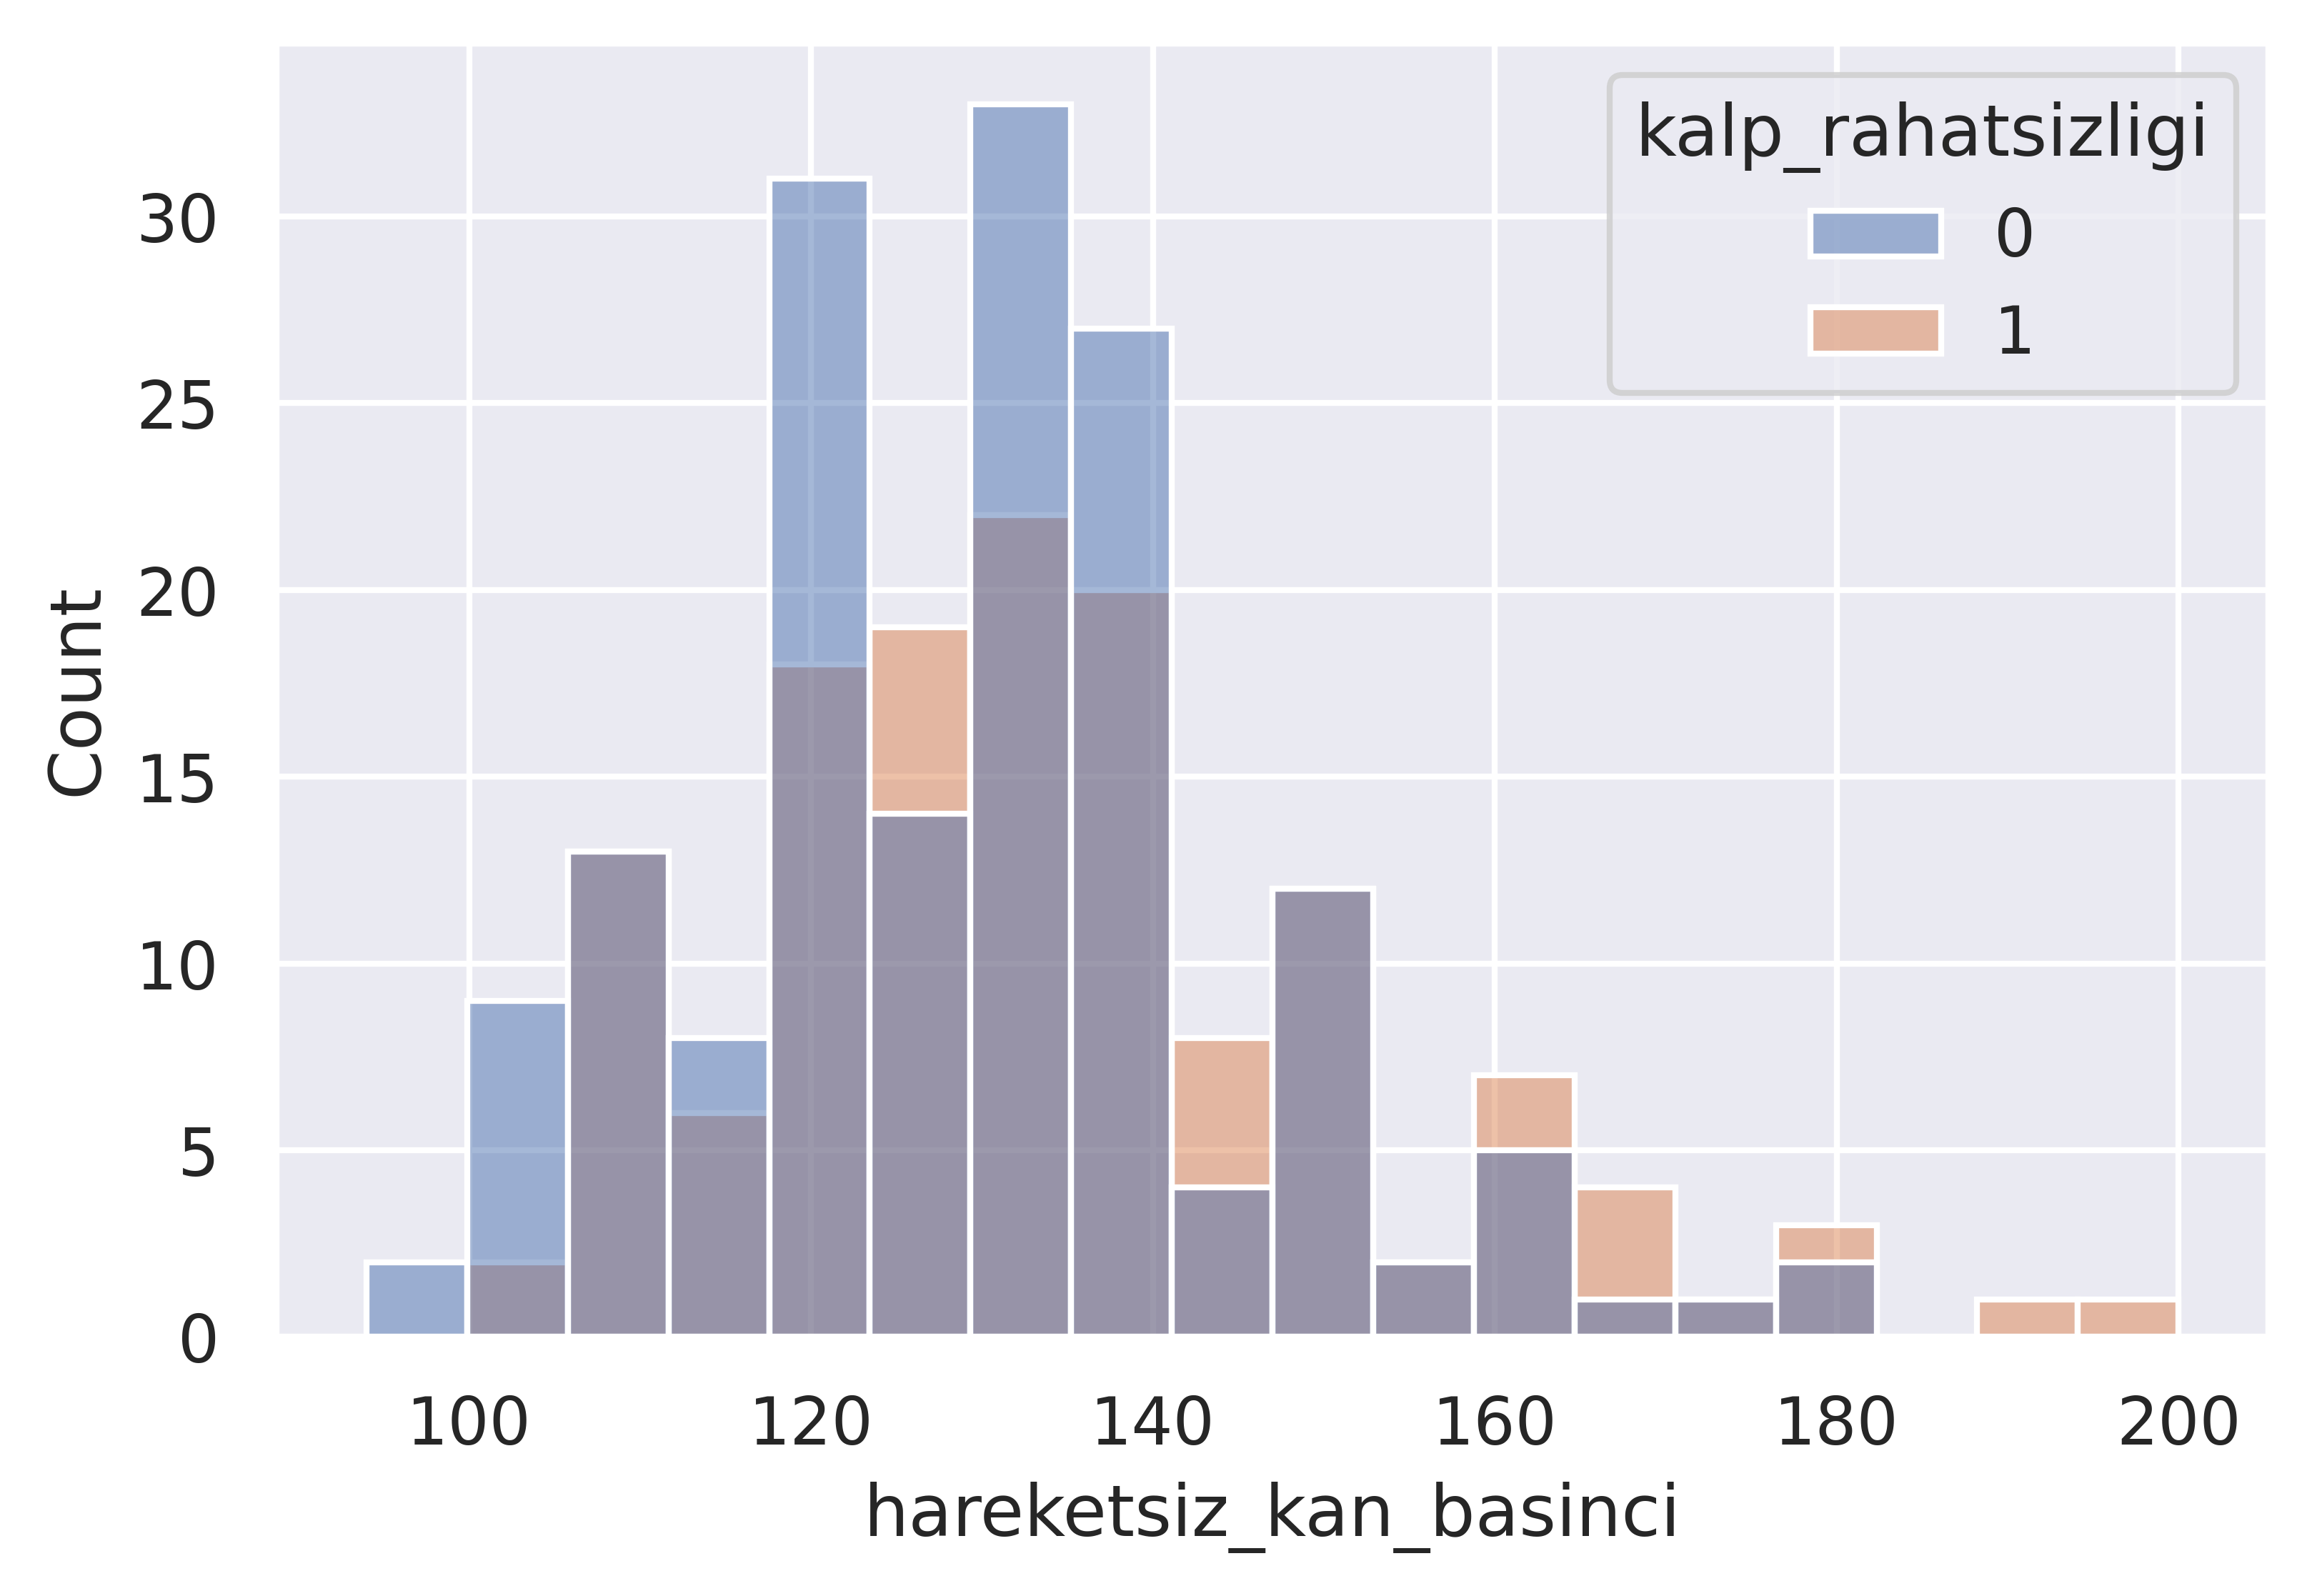

In [81]:
sns.histplot(veri,x="hareketsiz_kan_basinci",hue="kalp_rahatsizligi")#,element="step")

<AxesSubplot:xlabel='kalp_rahatsizligi', ylabel='count'>

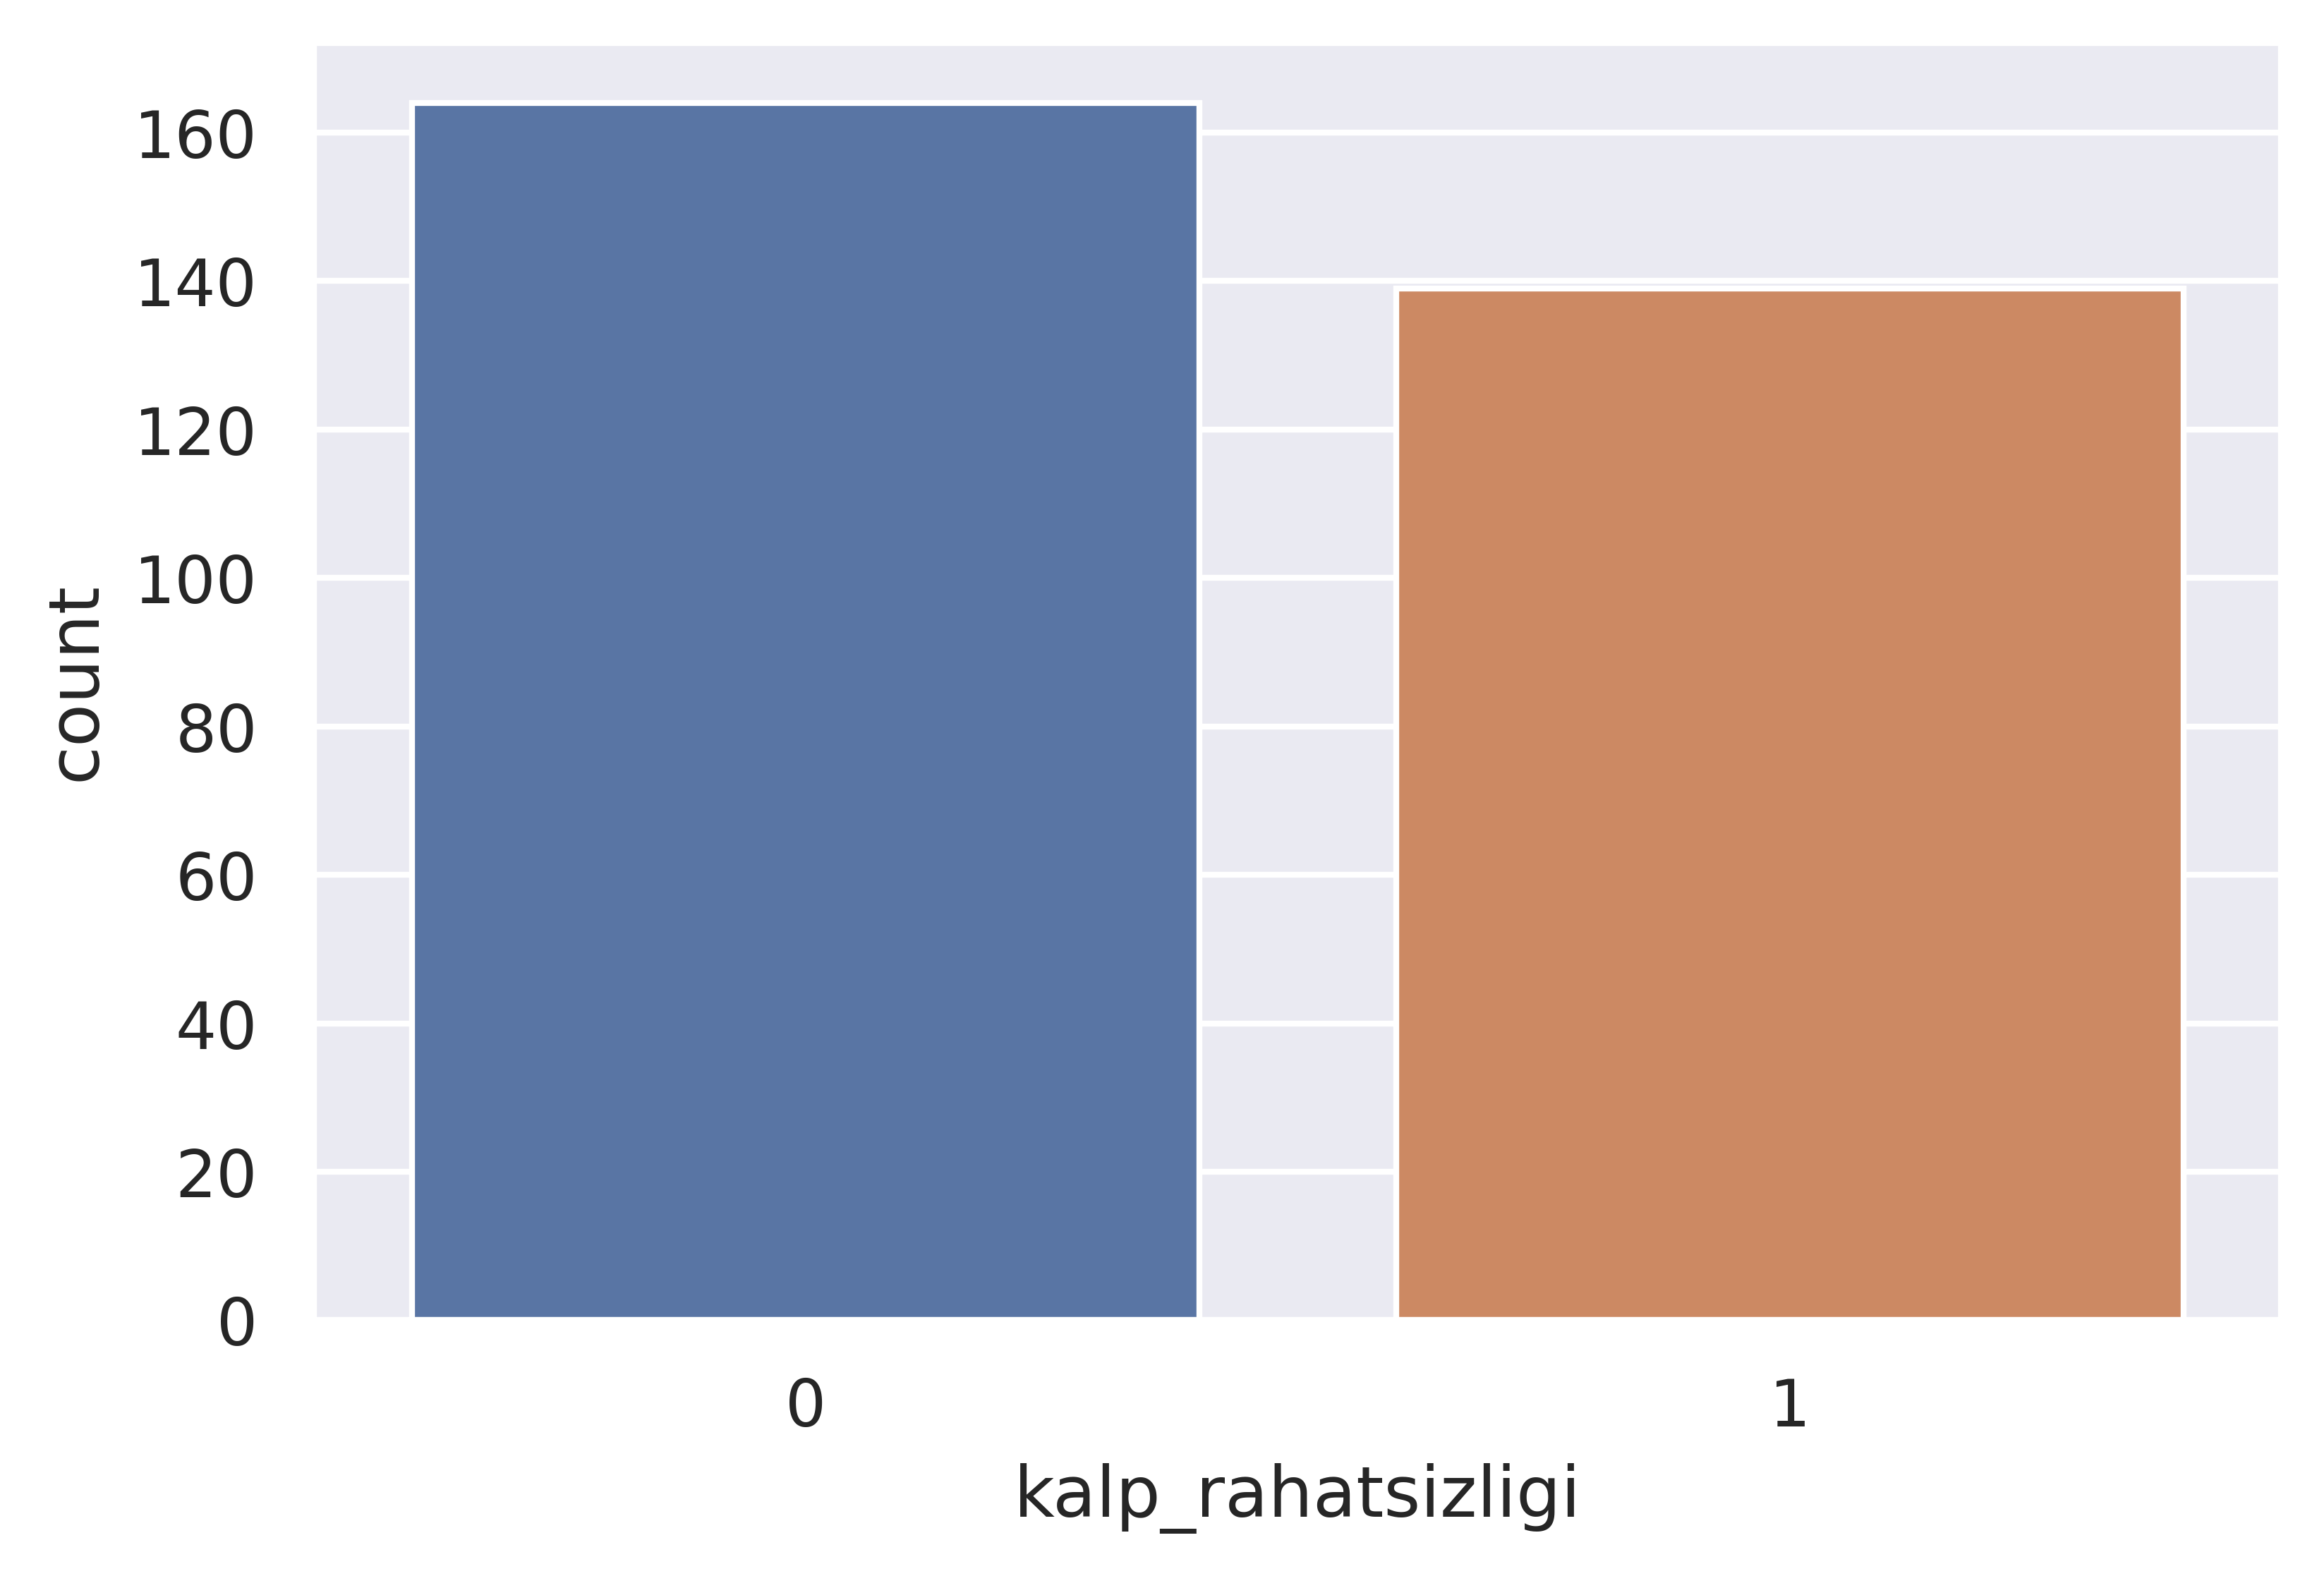

In [82]:
sns.countplot(data=veri,x="kalp_rahatsizligi")

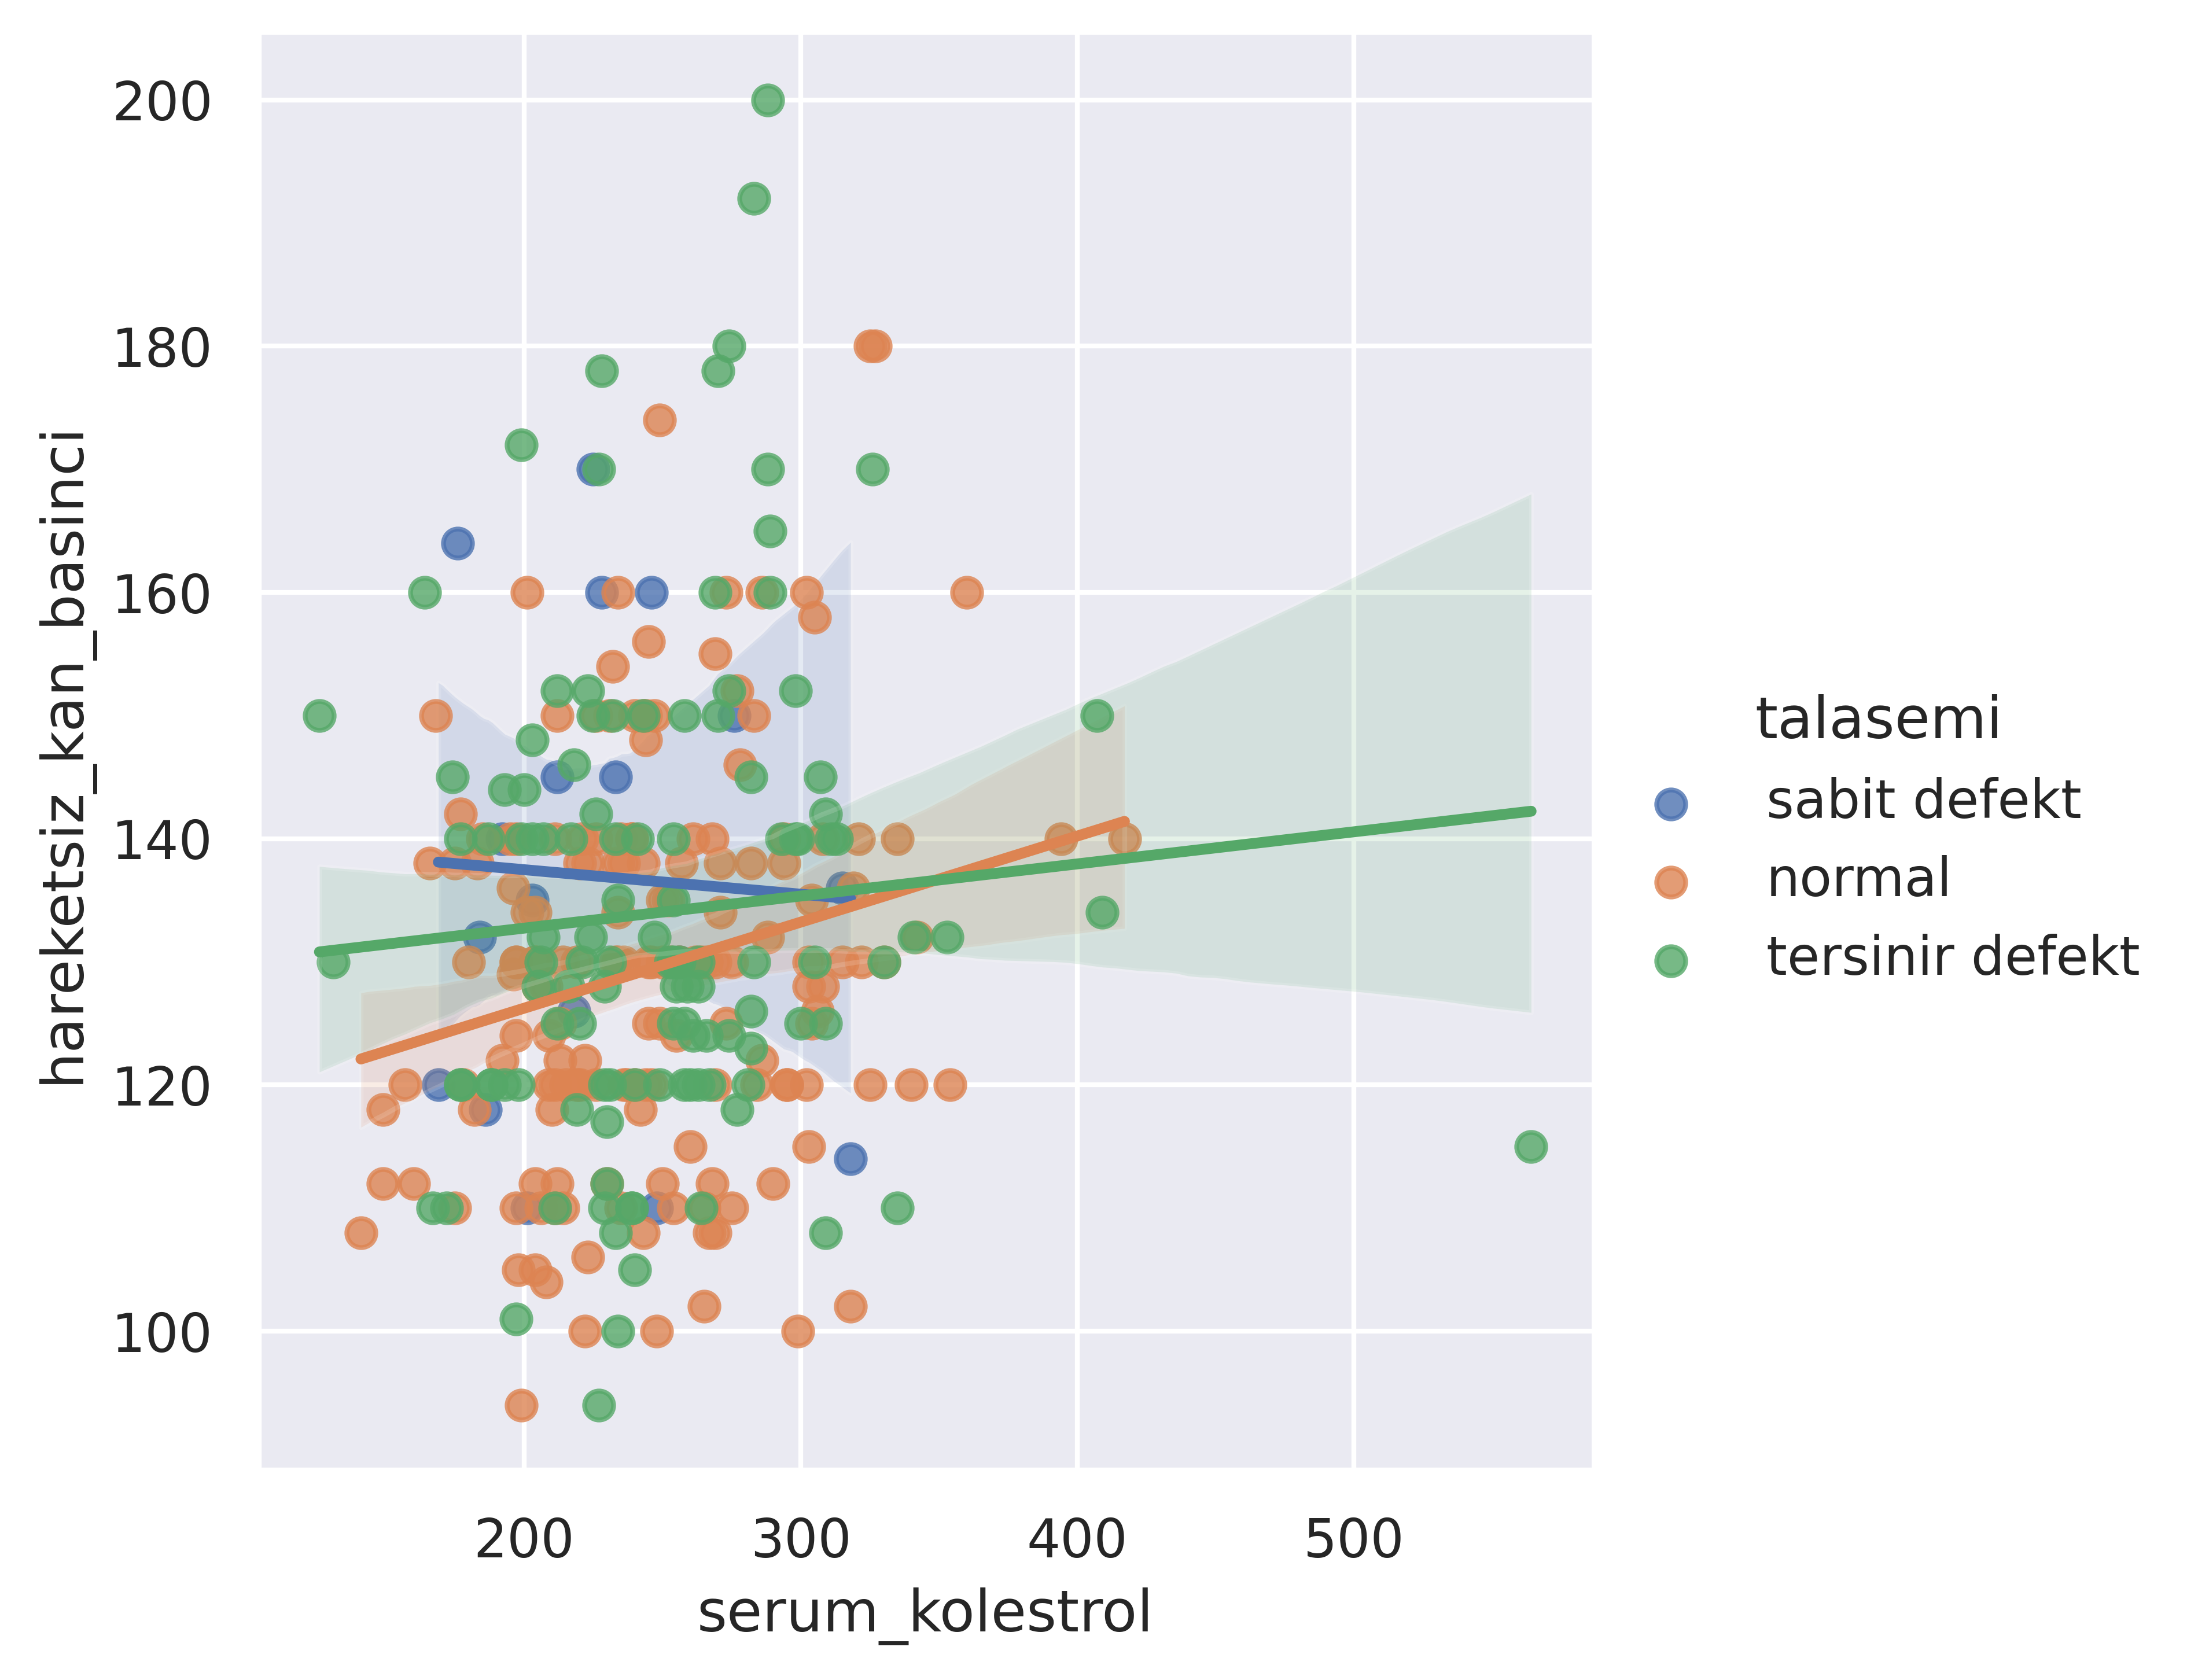

In [83]:
sns.lmplot(data=veri,x="serum_kolestrol",y="hareketsiz_kan_basinci",hue="talasemi")

<AxesSubplot:xlabel='talasemi', ylabel='hareketsiz_kan_basinci'>

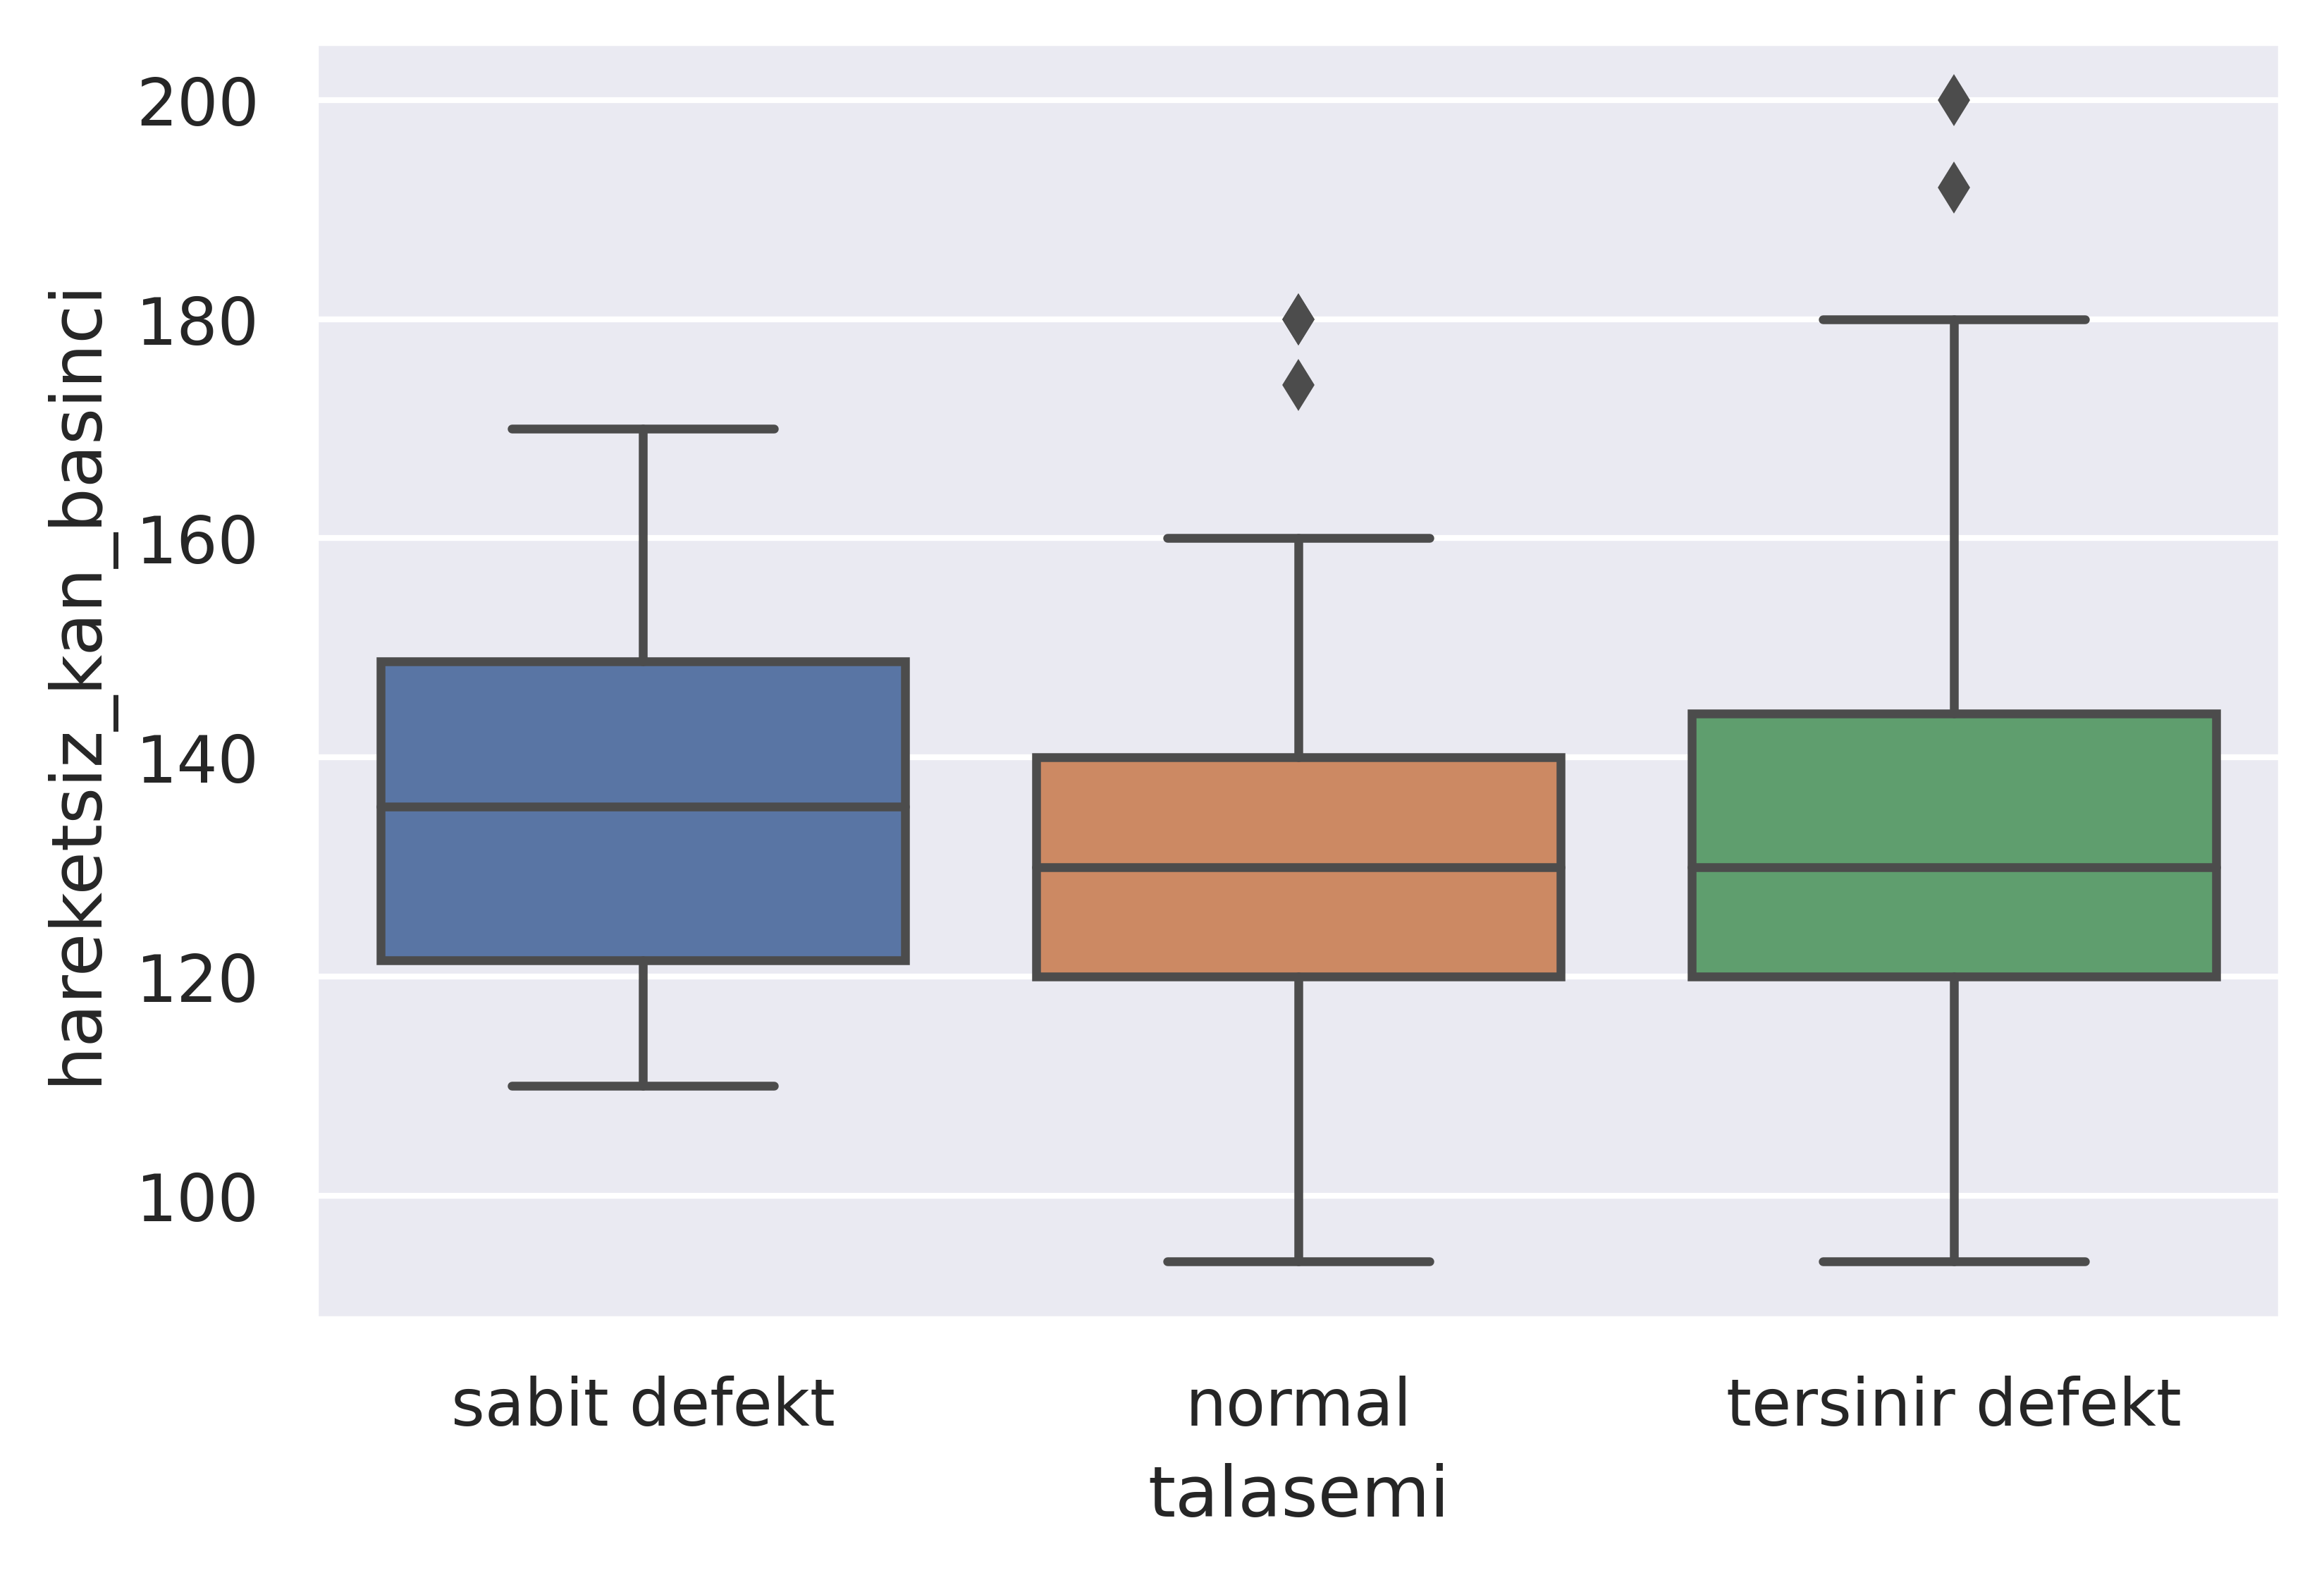

In [84]:
sns.boxplot(data=veri,y="hareketsiz_kan_basinci",x="talasemi")

<AxesSubplot:xlabel='yas', ylabel='en_yuksek_kalp_hizi'>

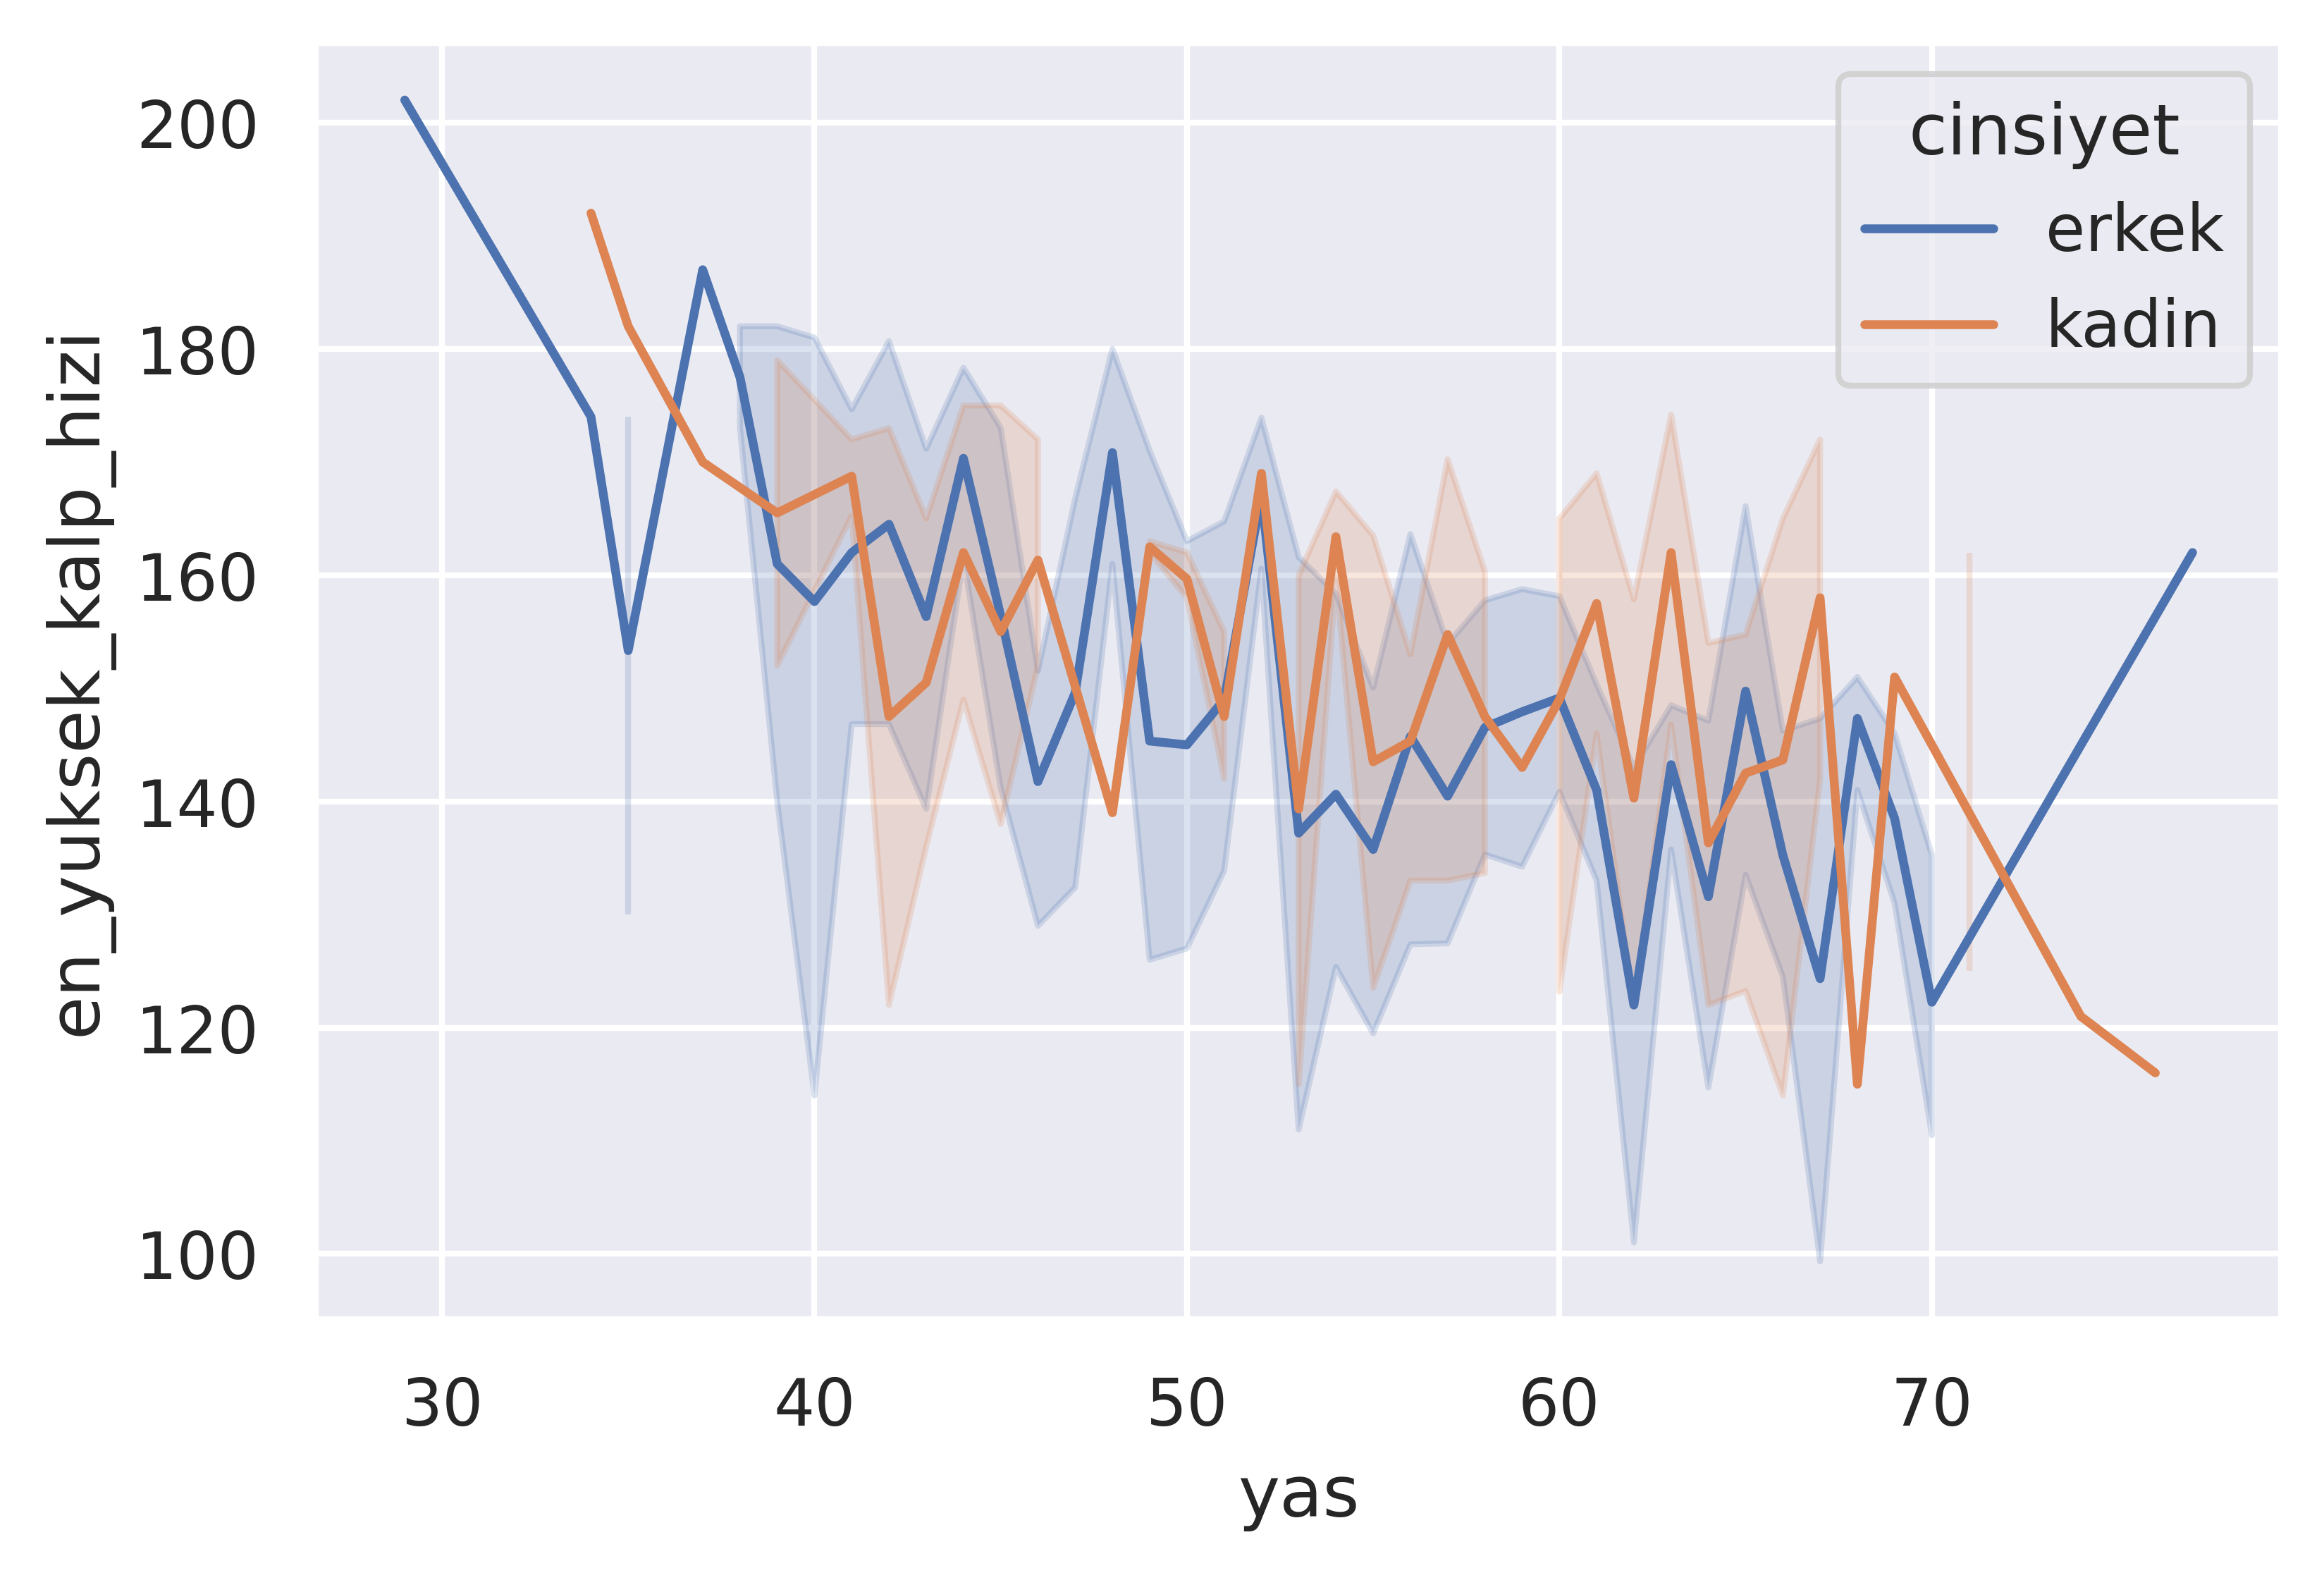

In [85]:
sns.lineplot(data=veri,x="yas",y="en_yuksek_kalp_hizi",hue=veri.cinsiyet)

In [86]:
veri.corr()

,yas,hareketsiz_kan_basinci,serum_kolestrol,aclik_kan_sekeri,en_yuksek_kalp_hizi,anjin_bagli_egsersiz,st_depresyonu,buyuk_damarlar,kalp_rahatsizligi
yas,1.000000,0.284946,0.208950,0.118530,-0.393806,0.091661,0.203805,0.362605,0.223120
hareketsiz_kan_basinci,0.284946,1.000000,0.130120,0.175340,-0.045351,0.064762,0.189171,0.098773,0.150825
serum_kolestrol,0.208950,0.130120,1.000000,0.009841,-0.003432,0.061310,0.046564,0.119000,0.085164
aclik_kan_sekeri,0.118530,0.175340,0.009841,1.000000,-0.007854,0.025665,0.005747,0.145478,0.025264
en_yuksek_kalp_hizi,-0.393806,-0.045351,-0.003432,-0.007854,1.000000,-0.378103,-0.343085,-0.264246,-0.417167
anjin_bagli_egsersiz,0.091661,0.064762,0.061310,0.025665,-0.378103,1.000000,0.288223,0.145570,0.431894
st_depresyonu,0.203805,0.189171,0.046564,0.005747,-0.343085,0.288223,1.000000,0.295832,0.424510
buyuk_damarlar,0.362605,0.098773,0.119000,0.145478,-0.264246,0.145570,0.295832,1.000000,0.460442
kalp_rahatsizligi,0.223120,0.150825,0.085164,0.025264,-0.417167,0.431894,0.424510,0.460442,1.000000


<AxesSubplot:>

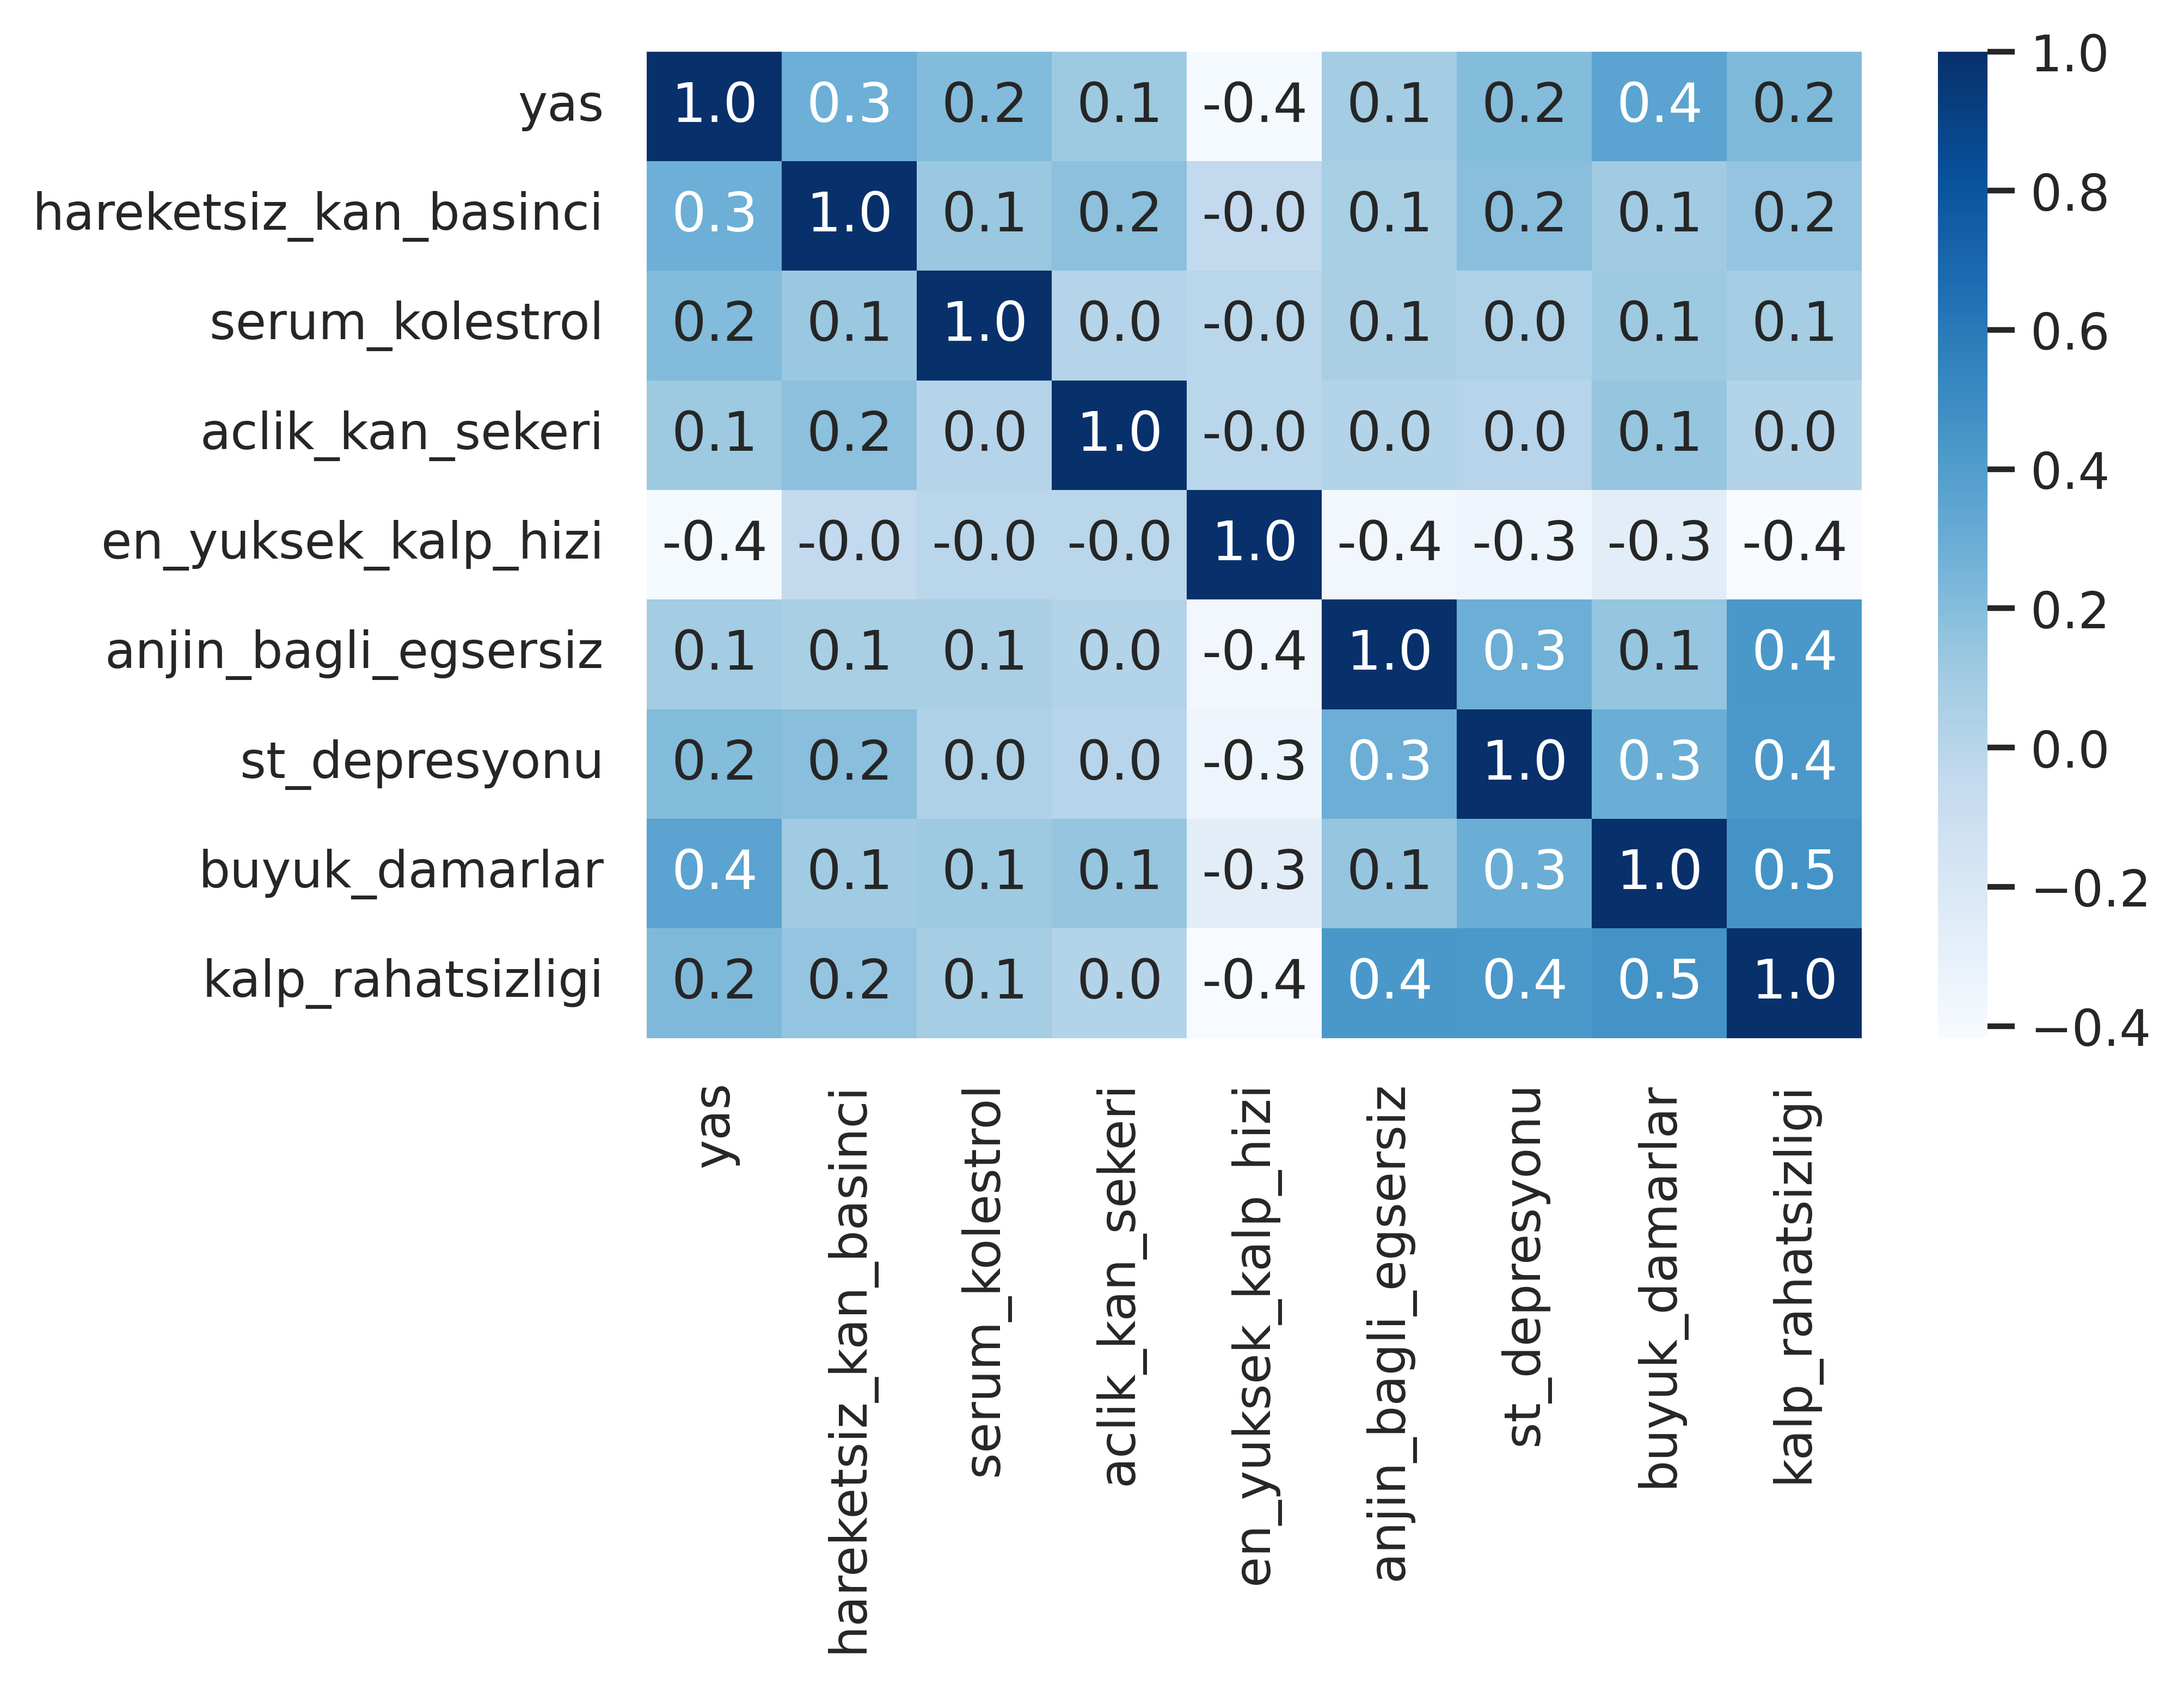

In [88]:
sns.heatmap(data=veri.corr(),cmap="Blues",annot=True,fmt="0.1f")